In [1]:
import pandas as pd
import numpy as np

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("transfers.csv")
df.head(10)

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015
5,GB1,2009,s,985,Manchester United,England,in,42411,Fraizer Campbell,21.0,...,148,Tottenham Hotspur,England,NaN,700000.0,False,True,True,False,301497
6,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,2962,Altrincham FC,England,NaN,NaN,False,True,True,False,351895
7,GB1,2009,s,985,Manchester United,England,in,73482,James Chester,20.0,...,2262,Plymouth Argyle,England,NaN,1200000.0,False,True,True,False,373518
8,GB1,2009,s,985,Manchester United,England,in,73491,Danny Drinkwater,20.0,...,1110,Huddersfield Town,England,NaN,3000000.0,False,True,True,False,404704
9,GB1,2009,s,985,Manchester United,England,in,34130,Tom Heaton,24.0,...,2805,Wycombe Wanderers,England,NaN,1000000.0,False,True,True,False,432238


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70006 entries, 0 to 70005
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   league                70006 non-null  object 
 1   season                70006 non-null  int64  
 2   window                70006 non-null  object 
 3   team_id               70006 non-null  int64  
 4   team_name             70006 non-null  object 
 5   team_country          70006 non-null  object 
 6   dir                   70006 non-null  object 
 7   player_id             70006 non-null  int64  
 8   player_name           70006 non-null  object 
 9   player_age            69990 non-null  float64
 10  player_nation         70001 non-null  object 
 11  player_nation2        23181 non-null  object 
 12  player_pos            70006 non-null  object 
 13  counter_team_id       70006 non-null  object 
 14  counter_team_name     70006 non-null  object 
 15  counter_team_countr

In [4]:
df = df.dropna()

In [8]:
df['is_free'] = df['is_free'].astype(int)
df['is_loan'] = df['is_loan'].astype(int)

In [47]:
df.isna().sum()

league                  0
season                  0
player_age              0
player_pos              0
market_val_amnt         0
team_country            0
counter_team_country    0
is_free                 0
is_loan                 0
transfer_fee_amnt       0
dtype: int64

In [48]:
df.isna().sum().sum()

np.int64(0)

In [10]:
print(df.columns)

Index(['league', 'season', 'window', 'team_id', 'team_name', 'team_country',
       'dir', 'player_id', 'player_name', 'player_age', 'player_nation',
       'player_nation2', 'player_pos', 'counter_team_id', 'counter_team_name',
       'counter_team_country', 'transfer_fee_amnt', 'market_val_amnt',
       'is_free', 'is_loan', 'is_loan_end', 'is_retired', 'transfer_id'],
      dtype='object')


In [13]:
df = df[
    [
        'league',
        'season',
        'player_age',
        'player_pos',
        'market_val_amnt',
        'team_country',
        'counter_team_country',
        'is_free',
        'is_loan',
        'transfer_fee_amnt'
    ]
]

X = df.drop('transfer_fee_amnt', axis=1)
y = df['transfer_fee_amnt']

df.head()


,league,season,player_age,player_pos,market_val_amnt,team_country,counter_team_country,is_free,is_loan,transfer_fee_amnt
2,GB1,2009,20.0,AM,400000.0,England,France,0,0,4000000.0
13,GB1,2009,21.0,CF,700000.0,England,England,0,0,4100000.0
48,GB1,2009,19.0,CM,150000.0,England,England,1,0,0.0
59,GB1,2009,21.0,DM,8000000.0,England,Slovakia,0,0,1750000.0
72,GB1,2009,19.0,CF,450000.0,England,Spain,0,0,1000000.0


In [15]:
df = df[
    [
        'league',
        'season',
        'player_age',
        'player_pos',
        'market_val_amnt',
        'team_country',
        'counter_team_country',
        'is_free',
        'is_loan',
        'transfer_fee_amnt'
    ]
]

# Features and target
X = df.drop('transfer_fee_amnt', axis=1)
y = df['transfer_fee_amnt']

df.head()


,league,season,player_age,player_pos,market_val_amnt,team_country,counter_team_country,is_free,is_loan,transfer_fee_amnt
2,GB1,2009,20.0,AM,400000.0,England,France,0,0,4000000.0
13,GB1,2009,21.0,CF,700000.0,England,England,0,0,4100000.0
48,GB1,2009,19.0,CM,150000.0,England,England,1,0,0.0
59,GB1,2009,21.0,DM,8000000.0,England,Slovakia,0,0,1750000.0
72,GB1,2009,19.0,CF,450000.0,England,Spain,0,0,1000000.0


In [16]:
# Define column types
numerical_features = ['season', 'player_age', 'market_val_amnt', 'is_free', 'is_loan']
categorical_features = ['league', 'player_pos', 'team_country', 'counter_team_country']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

rf_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
!pip install xgboost


In [21]:
from xgboost import XGBRegressor
xgb_test = XGBRegressor()
print(xgb_test)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [22]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror'
    ))
])

xgb_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
# Linear Regression
y_pred_lr = lr_pipeline.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)


In [24]:
# Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [25]:
# XGBoost
y_pred_xgb = xgb_pipeline.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)


In [26]:
print("Linear Regression RMSE:", rmse_lr, "| MAE:", mae_lr)
print("Random Forest RMSE:", rmse_rf, "| MAE:", mae_rf)
print("XGBoost RMSE:", rmse_xgb, "| MAE:", mae_xgb)

Linear Regression RMSE: 14695644.722335894 | MAE: 4290286.166568784
Random Forest RMSE: 16821802.06169226 | MAE: 2734870.3189844373
XGBoost RMSE: 14358488.667790813 | MAE: 2928284.4253151324


In [27]:
new_player = pd.DataFrame([{
    'league': 'Premier League',
    'season': 2025,
    'player_age': 24,
    'player_pos': 'Midfielder',
    'market_val_amnt': 35000000,
    'team_country': 'England',
    'counter_team_country': 'Spain',
    'is_free': 0,
    'is_loan': 0
}])

predicted_fee = xgb_pipeline.predict(new_player)[0]
print("Predicted Transfer Fee:", round(predicted_fee, 2))


Predicted Transfer Fee: 3.5837084e+07


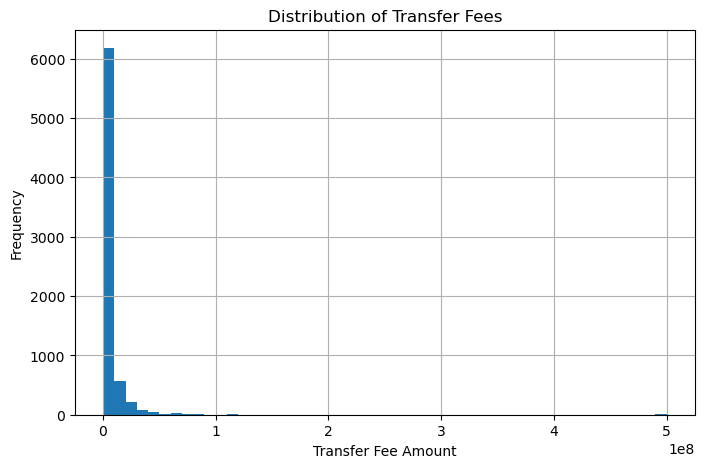

In [35]:
plt.figure(figsize=(8,5))
plt.hist(df['transfer_fee_amnt'], bins=50)
plt.xlabel("Transfer Fee Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transfer Fees")
plt.grid(True)
plt.show()


In [33]:
print(" Predicted Transfer Fee:", round(predicted_fee, 2))
print(" Actual Transfer Fee:", actual_fee)
print(" Valuation Decision:", valuation)


 Predicted Transfer Fee: 3.5837084e+07
 Actual Transfer Fee: 40000000
 Valuation Decision: Overvalued


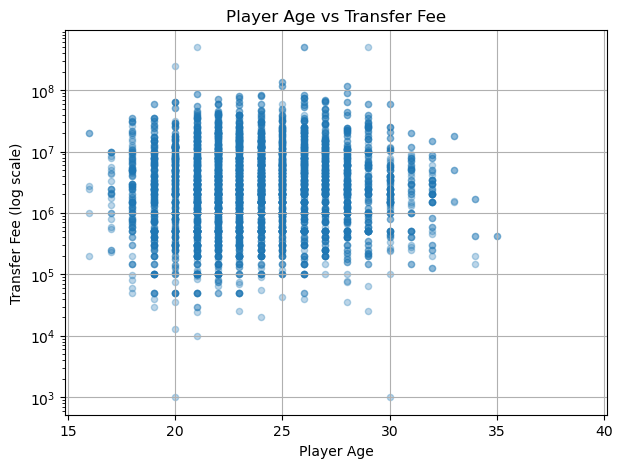

In [39]:
plt.figure(figsize=(7,5))
plt.scatter(
    df['player_age'],
    df['transfer_fee_amnt'],
    alpha=0.3,
    s=20
)
plt.yscale('log')
plt.xlabel("Player Age")
plt.ylabel("Transfer Fee (log scale)")
plt.title("Player Age vs Transfer Fee")
plt.grid(True)
plt.show()


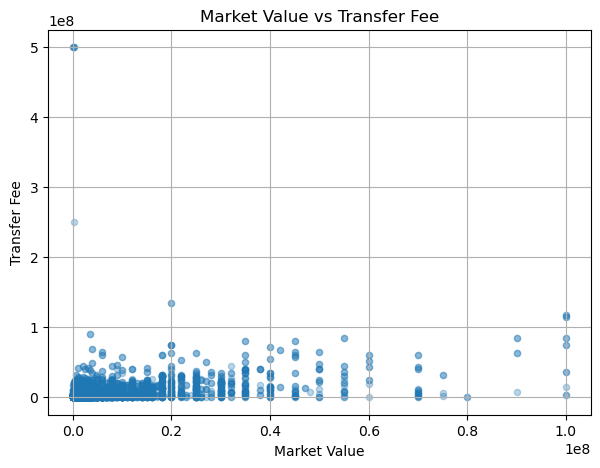

In [37]:
plt.figure(figsize=(7,5))
plt.scatter(
    df['market_val_amnt'],
    df['transfer_fee_amnt'],
    alpha=0.3,
    s=20
)
plt.xlabel("Market Value")
plt.ylabel("Transfer Fee")
plt.title("Market Value vs Transfer Fee")
plt.grid(True)
plt.show()


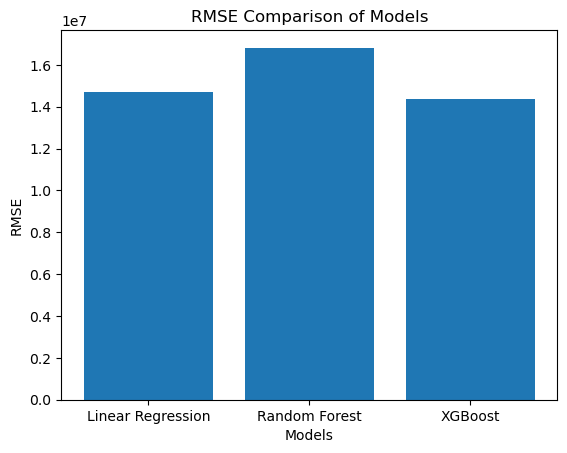

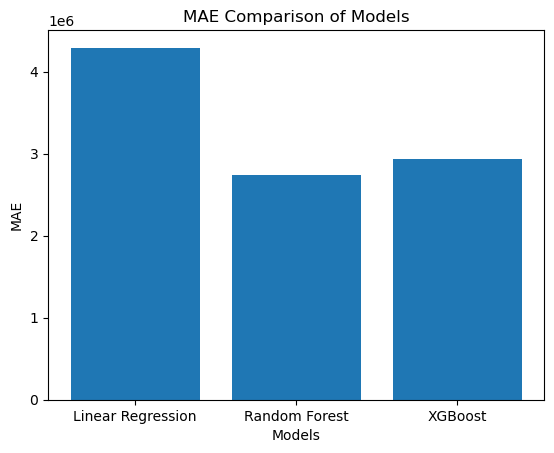

In [32]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_values = [rmse_lr, rmse_rf, rmse_xgb]
mae_values = [mae_lr, mae_rf, mae_xgb]

plt.figure()
plt.bar(models, rmse_values)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Models")
plt.show()

plt.figure()
plt.bar(models, mae_values)
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("MAE Comparison of Models")
plt.show()


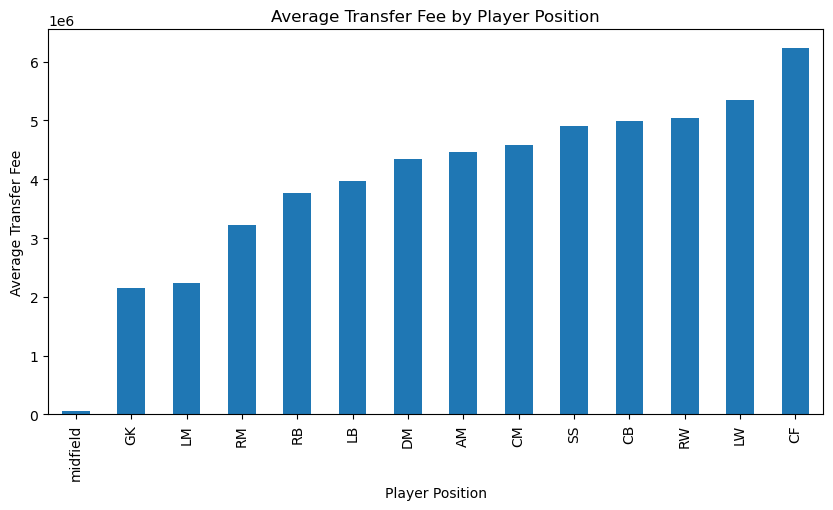

In [41]:
avg_pos_fee = df.groupby('player_pos')['transfer_fee_amnt'].mean()

plt.figure(figsize=(10,5))
avg_pos_fee.sort_values().plot(kind='bar')
plt.xlabel("Player Position")
plt.ylabel("Average Transfer Fee")
plt.title("Average Transfer Fee by Player Position")
plt.show()

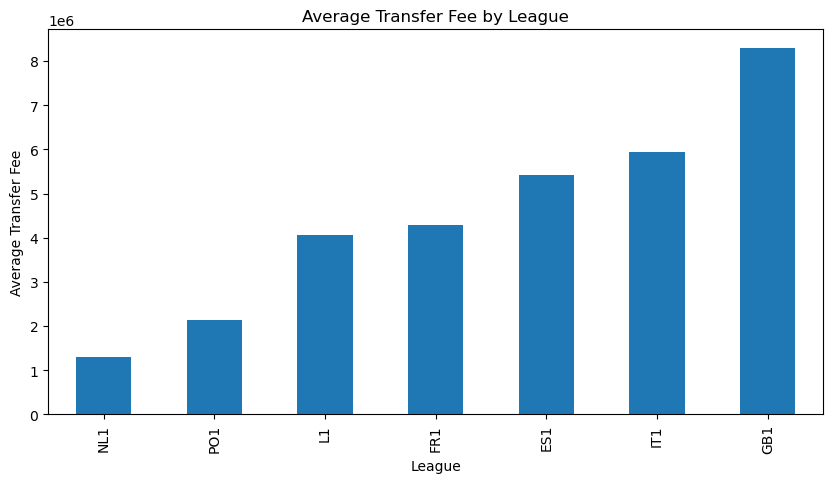

In [43]:
avg_league_fee = df.groupby('league')['transfer_fee_amnt'].mean()

plt.figure(figsize=(10,5))
avg_league_fee.sort_values().plot(kind='bar')
plt.xlabel("League")
plt.ylabel("Average Transfer Fee")
plt.title("Average Transfer Fee by League")
plt.show()


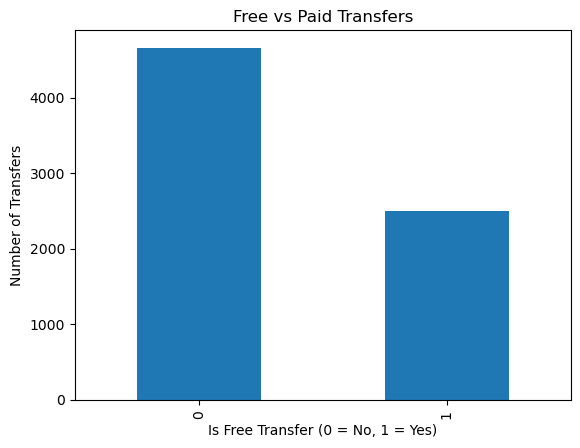

In [45]:
df['is_free'].value_counts().plot(kind='bar')
plt.xlabel("Is Free Transfer (0 = No, 1 = Yes)")
plt.ylabel("Number of Transfers")
plt.title("Free vs Paid Transfers")
plt.show()


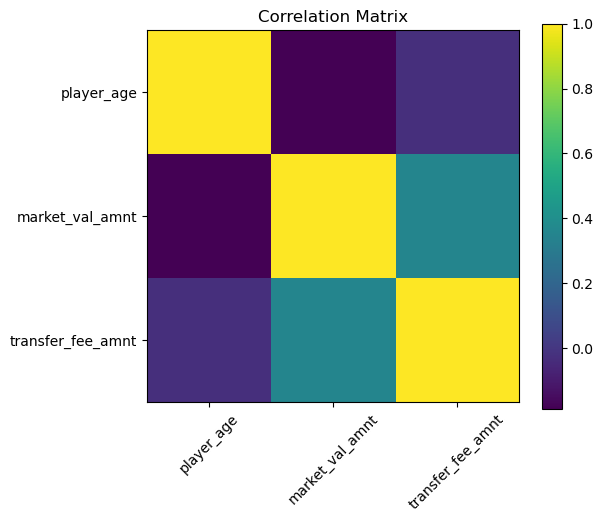

In [46]:
corr = df[
    ['player_age', 'market_val_amnt', 'transfer_fee_amnt']
].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()
